# Distribuição de notas dadas aos  filmes

Entenderemos a distribuição das notas dadas aos filmes por meio de histogramas ou boxplots, com os quais faremos comparações. Assim, conseguiremos resumir informações de diversos filmes, como as línguas mais populares contidas no conjunto de dados coletados, por meio de visualizações de gráficos mais interessantes e difíceis de serem compreendidos de início.

carregaremos um conjunto de dados do mundo real, oriundo do [MovieLens](https://movielens.org/ "MovieLens Non-commercial, personalized movie recommendations."), que trabalha com filmes e notas.

In [64]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Leitura do arquivo CSV
notas = pd.read_csv("ml-latest-small/ratings.csv")

In [3]:
# Visualizar as primeiras 5 linhas
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.shape

(100836, 4)

In [5]:
# Tradução das colunas - Não é necessário
notas.columns = ['usuarioId', 'filmeId', 'nota','momento']

In [6]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
# Uma coluna é conhecida como Series
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [8]:
# Valores únicos de uma coluna
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
# Contagem da quantidade de notas
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [10]:
# Média das notas
notas['nota'].mean()

3.501556983616962

<AxesSubplot:ylabel='Frequency'>

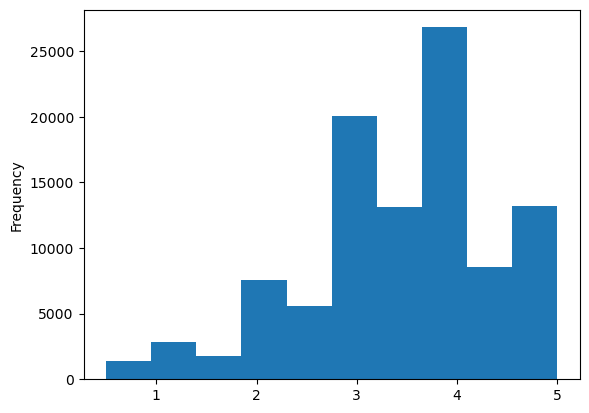

In [11]:
# Plotar uma coluna específica
notas.nota.plot(kind='hist')

In [12]:
# Média e mediana
print('Media: ',notas.nota.mean())
print('Mediana: ',notas.nota.median())

Media:  3.501556983616962
Mediana:  3.5


In [13]:
# Descrição dos dados
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [14]:
# Import biblioteca de visualização
import seaborn as sns

<AxesSubplot:xlabel='nota'>

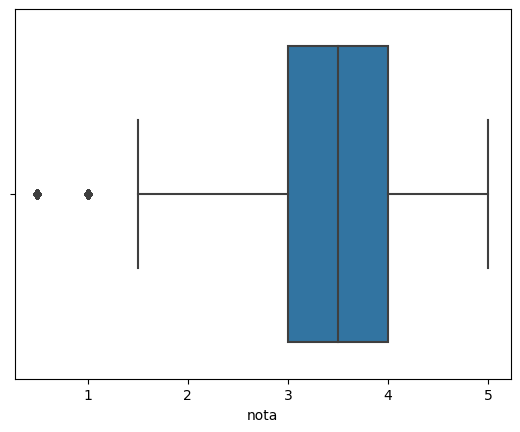

In [15]:
# Frequência das notas usando o boxplot
sns.boxplot(x=notas.nota)

In [16]:
# Importe o dataframe movies
filmes = pd. read_csv('ml-latest-small/movies.csv')

## Visualizando os filmes deste dataset

In [17]:
# visualizar os dados iniciais
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
# Renomear as colunas
filmes.columns = ['filmeId','titulo','generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [20]:
notas.query('filmeId==1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


# Analisando as notas específicas de um filme

In [21]:
# filtro: a partir do filme que tem o ID=1, quais as informações.
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [22]:
notas.query('filmeId==2').nota.mean()

3.4318181818181817

In [23]:
# Agrupar e capturar somente as médias das notas de cada filme. Uma série!
medias_por_filme = notas.groupby('filmeId').mean()['nota']
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

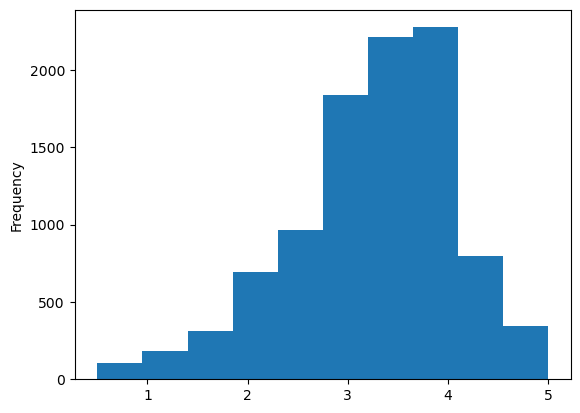

In [24]:
# Visualização das notas por histograma
medias_por_filme.plot(kind='hist')

<AxesSubplot:xlabel='nota'>

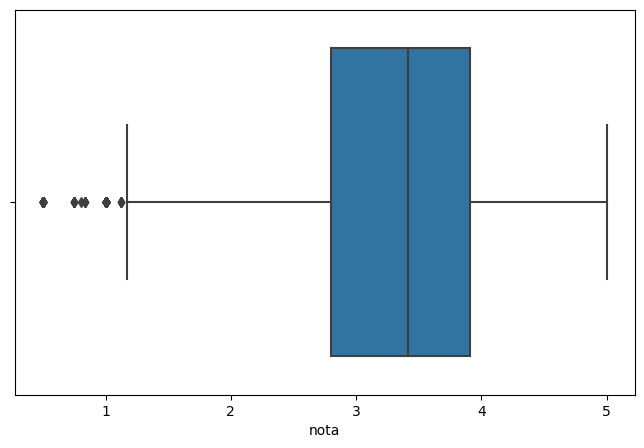

In [25]:
# Visualização das notas por boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=medias_por_filme)

In [26]:
# Descrição dos dados 
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

In [27]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<AxesSubplot:xlabel='nota', ylabel='Density'>

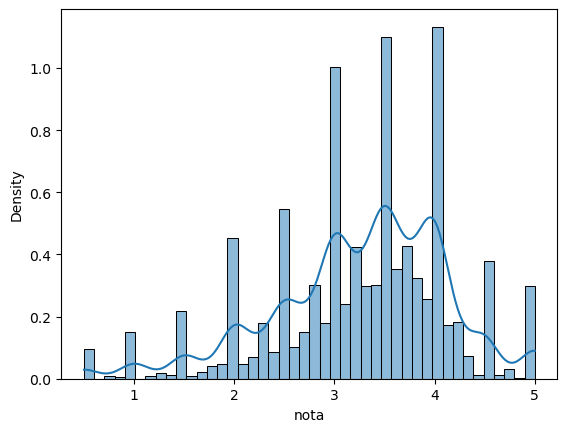

In [28]:
sns.histplot(medias_por_filme, kde=True, stat="density")

<AxesSubplot:xlabel='nota', ylabel='Density'>

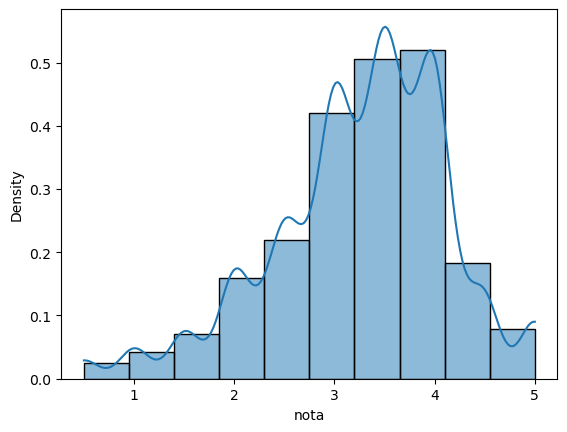

In [29]:
sns.histplot(medias_por_filme, bins=10, kde=True, stat="density")

Text(0.5, 1.0, 'Histograma das médias dos filmes')

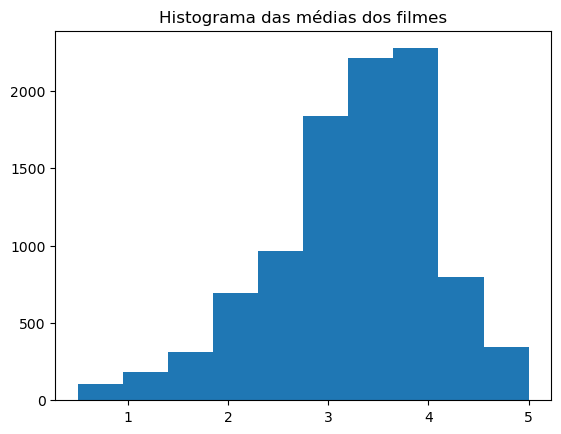

In [30]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

# Conjunto de dados de filmes TMDB 5000
Agora, utilizaremos o conjunto TMDB 5000 Movie Dataset, um dataset hospedado no [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata), com informações sobre 5000 filmes.

In [31]:
tmdb = pd.read_csv("archive/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [32]:
# Variável categórica nominal
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [33]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language',"total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<AxesSubplot:xlabel='original_language', ylabel='total'>

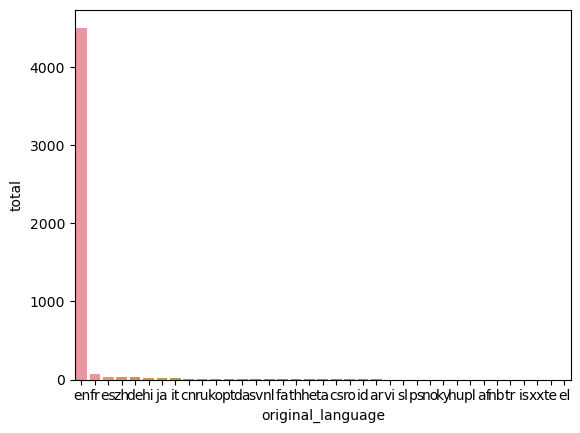

In [34]:
sns.barplot(x='original_language', y='total',data=contagem_de_lingua)

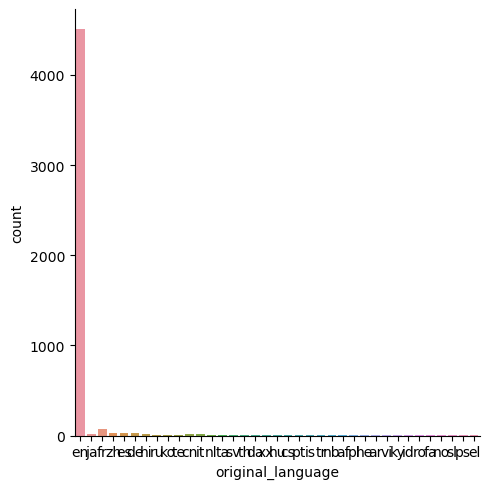

In [35]:
sns.catplot(x='original_language', kind='count', data = tmdb)

([<matplotlib.patches.Wedge at 0x7fbe4bd98be0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

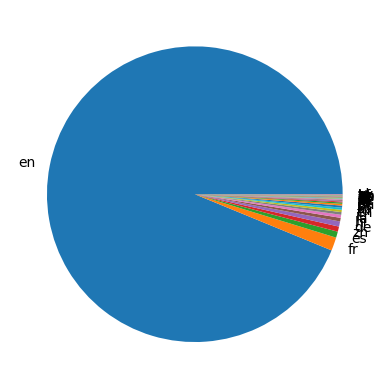

In [36]:
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['original_language'])

In [37]:
total_por_lingua = tmdb.original_language.value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [38]:
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [39]:
pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


<AxesSubplot:>

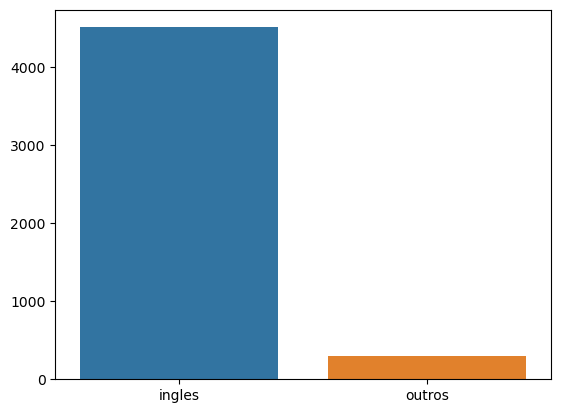

In [40]:
sns.barplot(x='lingua', y='total', data=dados)

([<matplotlib.patches.Wedge at 0x7fbe40516e20>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

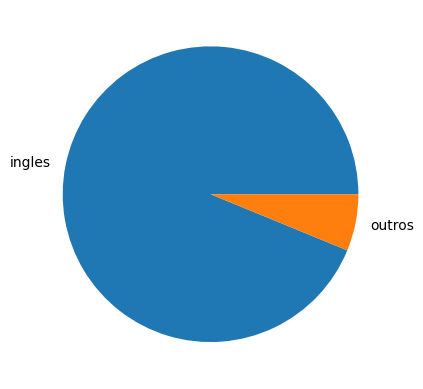

In [41]:
plt.pie(dados['total'], labels = dados['lingua'])

In [42]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

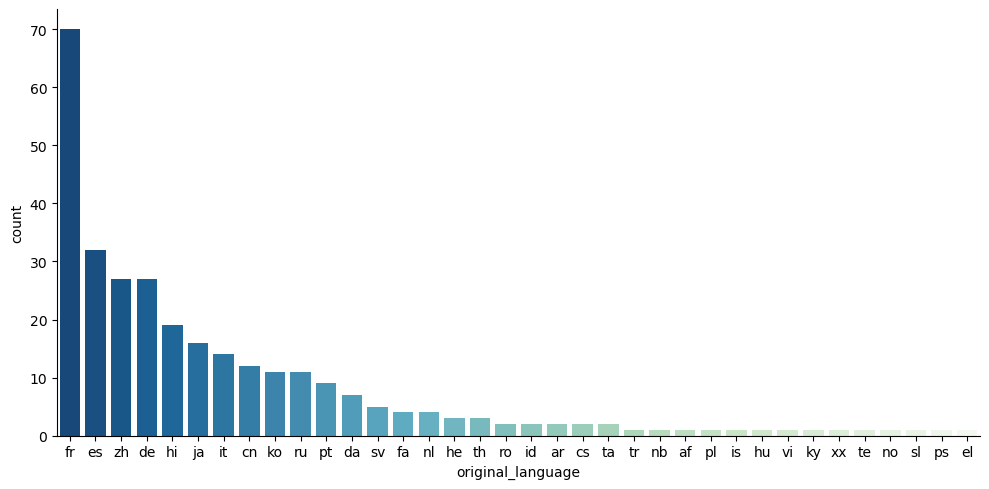

In [43]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(
    x = "original_language", 
    kind = "count", 
    data = filmes_sem_lingua_original_em_ingles, 
    aspect = 2,
    order = total_por_lingua_de_outros_filmes.index,
    palette="GnBu_r"
)

## Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padráo, box plot, histograma

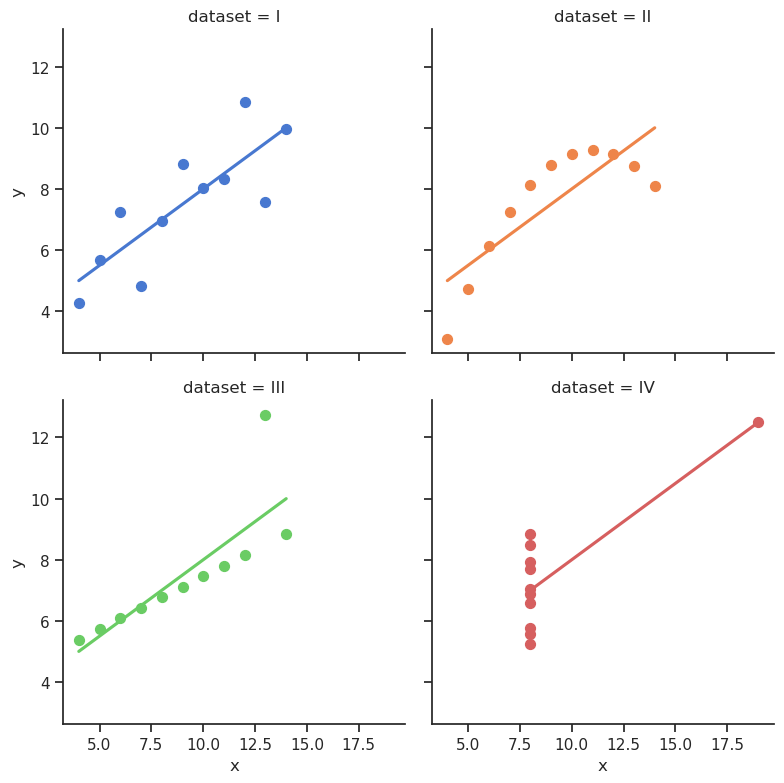

In [44]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [45]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [46]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [47]:
notas_do_toy_story = notas.query('filmeId==1')
notas_do_jumanji = notas.query('filmeId==2')
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [48]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [49]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.median())

Nota média do Toy Story 4.00
Nota média do Jumanji 3.50


<AxesSubplot:xlabel='nota'>

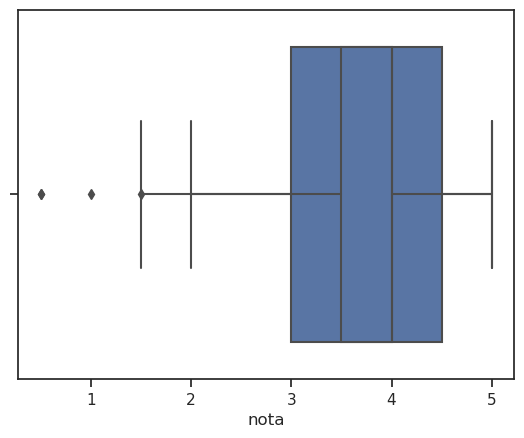

In [51]:
sns.boxplot(x=notas_do_toy_story.nota)
sns.boxplot(x=notas_do_jumanji.nota)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe3aabccd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe3aa4c2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe3aabca00>,
 'medians': [<matplotlib.lines.Line2D at 0x7fbe3aa4c850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe3aa4cb20>,
 'means': []}

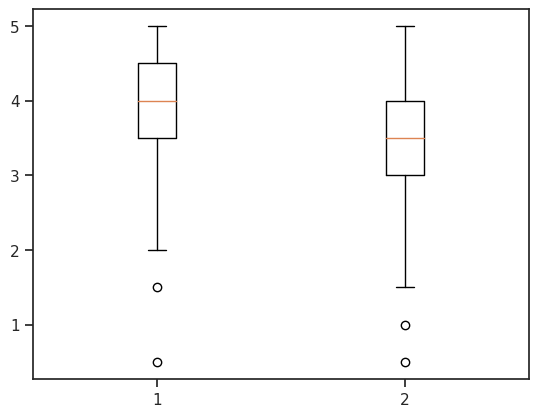

In [55]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

<AxesSubplot:xlabel='filmeId', ylabel='nota'>

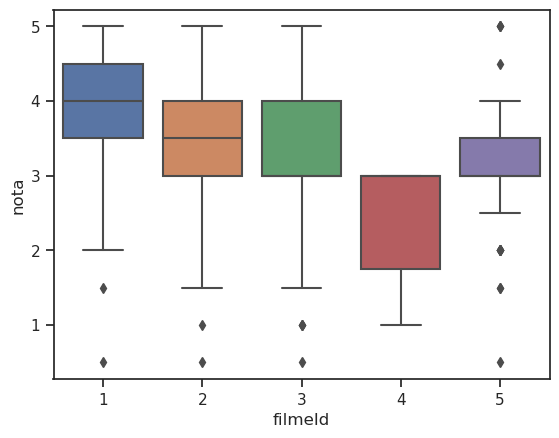

In [62]:
sns.boxplot(x = 'filmeId', y='nota', data = notas.query('filmeId in [1,2,3,4,5]'))

## Desvio padrão

In [89]:
print(notas_do_toy_story.nota.std(), notas_do_jumanji.nota.std())

0.8348591407114045 0.8817134921476455


In [71]:
print(np.std(notas_do_toy_story.nota), np.std(notas_do_jumanji.nota))
print(np.median(notas_do_toy_story.nota), np.median(notas_do_jumanji.nota))

0.8329153449641146 0.8776965532969931
4.0 3.5
